./quantas.exe quantas/PBFTPeer/PBFTInput.json


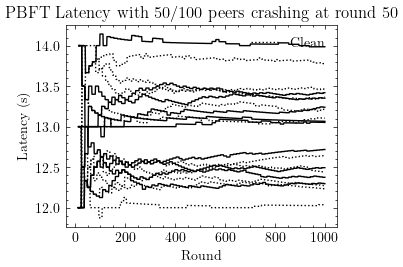

In [94]:
!make run
%matplotlib inline
import matplotlib.pyplot as plt
import scienceplots  # scientific themes for matplotlib
import numpy as np
import json

clean = json.load(open("PBFTDelay10.out"))
infected = json.load(open("PBFTDelay10infectRound20.out"))

cleanLatency = np.array(list(map(lambda x: x['latency'], clean['tests'])))
infectedLatency = np.array(list(map(lambda x: x['latency'], infected['tests'])))

# create an array for the x axis. A range from 0 to ...
x = np.arange(0, len(cleanLatency[0]))

with plt.style.context('science'):
    # set line color to black
    plt.plot(x, cleanLatency.T, ':', color='black')
    plt.plot(x, infectedLatency.T, color='black')
    plt.legend(['Clean'])
    # set line type to dotted for the first and solid for the second
    plt.xlabel('Round')
    plt.ylabel('Latency (s)')
    plt.title('PBFT Latency with 50/100 peers crashing at round 50')
    plt.show()
